import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
%matplotlib inline

load iris dataset

In [ ]:
iris=datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

assign value to x & Y

In [ ]:
x=iris.data[:,:2]
y=(iris.target !=0)*1

visualization

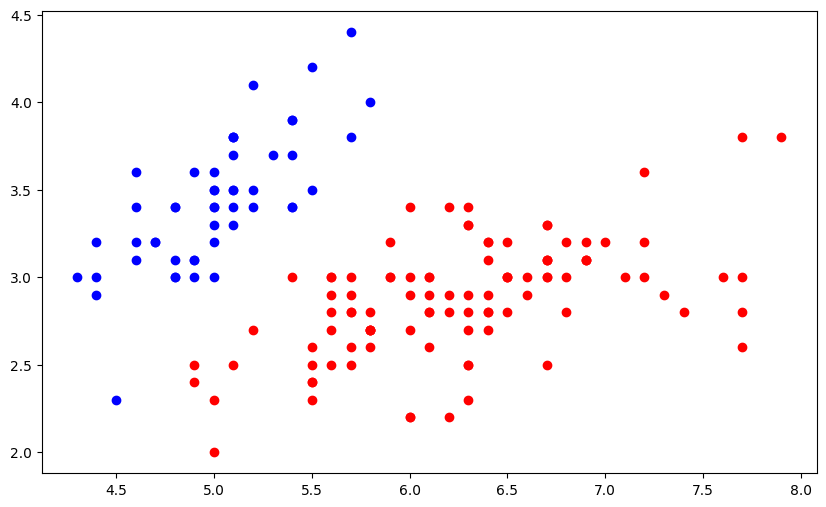

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x[y==0][:,0],x[y==0][:,1],color='blue',label='0')
plt.scatter(x[y==1][:,0],x[y==1][:,1],color='red',label="1")
plt.show()

logistic regression

In [ ]:
class LogisticRegression:
  def __init__(self,lr=0.1,num_iter=100000,fit_intercept=True,verbose=False):
    self.lr=lr
    self.num_iter=num_iter
    self.fit_intercept=fit_intercept
    self.verbose=verbose

  # for accomodating fit intercept value add a column of ones
  def __add_intercept(self,x):
    intercept=np.ones((x.shape[0],1)) #tuple specifies the shape of the array to be created rows and columns
    return  np.concatenate((intercept,x),axis=1)

  #compute the sigmoid function
  def __sigmoid(self,z):
    return 1/(1+np.exp(-z))

  #loss function between the predicted probabilities h and the true labels y
  def __loss(self,h,y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

  # training of the logistic regression model
  def fit(self,x,y):
    if self.fit_intercept:
      x=self.__add_intercept(x) #If fit_intercept is True, it adds the intercept term to the feature matrix X.
    self.theta=np.zeros(x.shape[1]) # length of self.theta is set to the number of features in x

    for i in range(self.num_iter):
      z=np.dot(x,self.theta)
      h=self.__sigmoid(z)
      gradient=np.dot(x.T,(h-y))/y.shape
      self.theta-=self.lr*gradient

      z=np.dot(x,self.theta)
      h=self.__sigmoid(z)
      loss=self.__loss(h,y)

      if(self.verbose==True and i%10000==0):
        print(f'loss:{loss}\t')

  def predict_prob(self,x):
    if self.fit_intercept:
      x=self.__add_intercept(x)
    return self.__sigmoid(np.dot(x,self.theta))

  def predict(self,x):
    return self.predict_prob(x).round()


In [ ]:
# create an instance of the above class logistic regression
model=LogisticRegression(lr=0.1,num_iter=300000,verbose=True)
#train the model
%time model.fit(x,y)#% time is to measure the execution time of a code cell.


loss:0.6106904453410645	
loss:0.03432718644226481	
loss:0.028786652134558194	
loss:0.025718548517683595	
loss:0.0234084275846366	
loss:0.021507024522720488	
loss:0.019892368181604787	
loss:0.01850316644094787	
loss:0.017299193592041302	
loss:0.016249738703587712	
loss:0.015329838490314536	
loss:0.014518833591009705	
loss:0.013799605037762758	
loss:0.013158006956155608	
loss:0.012582374964505335	
loss:0.012063092454345647	
loss:0.01159221693637487	
loss:0.011163166780906657	
loss:0.010770464048285635	
loss:0.01040952627650971	
loss:0.010076499250545106	
loss:0.009768123172684332	
loss:0.009481625616205837	
loss:0.009214635760287606	
loss:0.008965115461932587	
loss:0.008731303635409624	
loss:0.008511671162408238	
loss:0.008304884158053576	
loss:0.008109773891466244	
loss:0.007925312028698183	
CPU times: user 16.6 s, sys: 78.6 ms, total: 16.7 s
Wall time: 16.8 s


In [ ]:
#predict the label for input data x
pred=model.predict (x)
# accuracy
(pred==y).mean()

1.0

visualization - decision boundary

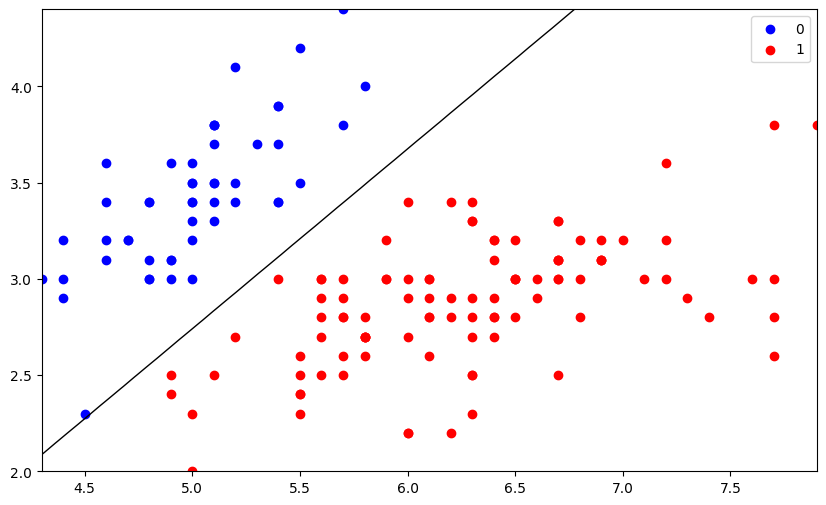

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x[y==0][:,0],x[y==0][:,1],color='blue',label='0')
plt.scatter(x[y==1][:,0],x[y==1][:,1],color='red',label='1')
plt.legend()
x1_min, x1_max = x[:,0].min(), x[:,0].max(),
x2_min, x2_max = x[:,1].min(), x[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]#Reshapes the mesh grids into 1D arrays and concatenates them column-wise to form a grid of points
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');#Contour level at which the decision boundary is drawn, representing the probability threshold (0.5) for binary classification.

# using scikit-learn

In [1]:
#import libraries
import numpy as np
from sklearn import linear_model

# define data
X = np.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)#Reshaped to a 2D array using reshape(-1,1) as scikit-learn expects input data to be 2D.
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

#training the logistic regression model
logr=linear_model.LogisticRegression()
logr.fit(X,y)

#making predictions
predicted=logr.predict(np.array([3.46]).reshape(-1,1))
print(predicted)

[0]
